# Enfoque clásico de Series de tiempo

**Estadística Aplicada**

**Cinthya Yesenia López Díaz 1658003**

**Sesión 12 - 17 marzo 2023**

En el enfoque clásico de Series de tiempo, se considera que una serie se puede descomponer en cuatro elementos:

1. Tendencia "T"
2. Ciclo "C"
3. Estacional "S"
4. Irregular "E"

Usualmente se considera que no es posible separar la tendencia del ciclo, por lo que se presentan juntos en lo que se llama tendencia-ciclo (tendencia).

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Modelo ETS (Error-Trend-Seasonally)
# Modelo de Tendencia(ciclo)-Estacional_Irregular
from statsmodels.tsa.api import seasonal_decompose

In [3]:
# base de datos
pasajeros = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/airline_passengers.csv')

In [4]:
pasajeros.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
pasajeros = pasajeros.rename(columns={'Month':'mes', 'Thousands of Passengers':'miles de pasajeros'})

In [7]:
pasajeros.head()

,mes,miles de pasajeros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
# mes se reconzca como variable de fecha
pasajeros['mes'] = pd.to_datetime(pasajeros['mes'])

In [9]:
pasajeros.head()

,mes,miles de pasajeros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [10]:
# mes sea el index
pasajeros = pasajeros.set_index('mes')

In [11]:
pasajeros.head()

,miles de pasajeros
mes,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [12]:
# index tiene frecuencia mensual "Montly series"
pasajeros.index.freq = 'MS'

In [21]:
pasajeros.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='mes', length=144, freq='MS')

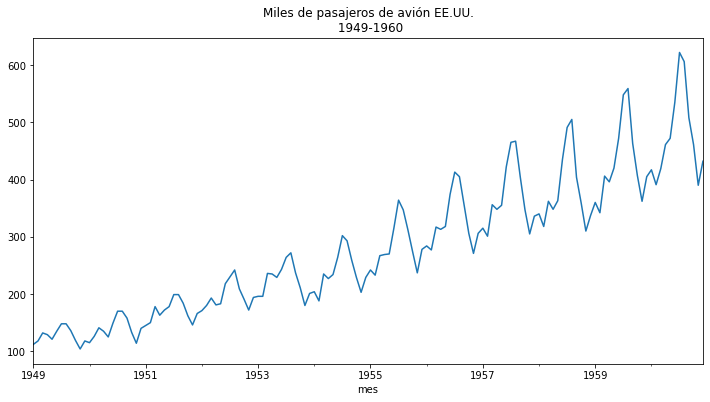

In [22]:
pasajeros['miles de pasajeros'].plot(figsize=(12,6));
plt.title('Miles de pasajeros de avión EE.UU.\n 1949-1960');

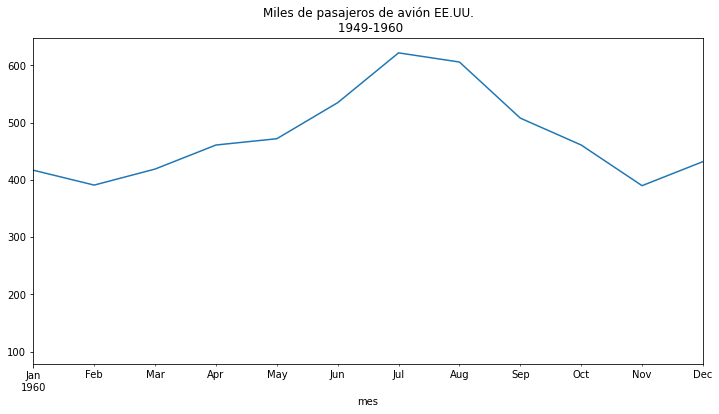

In [23]:
pasajeros['miles de pasajeros'].plot(figsize=(12,6));
plt.title('Miles de pasajeros de avión EE.UU.\n 1949-1960');
plt.xlim('1960-01','1960-12');

In [24]:
serieETS = seasonal_decompose(pasajeros['miles de pasajeros'], model='mult')

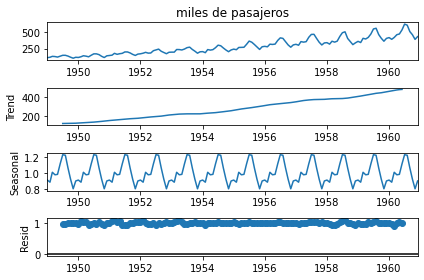

In [26]:
serieETS.plot()
plt.show()

Una serie desestacionalizada (Seasonally Adjusted) es una serie sin su componente estacional.

In [27]:
# estacional
serieETS.seasonal

# tendencia(ciclo)
serieETS.trend

# irregular
serieETS.resid

mes
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Freq: MS, Name: resid, Length: 144, dtype: float64

In [28]:
pasajeros['desestacionalizada'] = pasajeros['miles de pasajeros'] / serieETS.seasonal

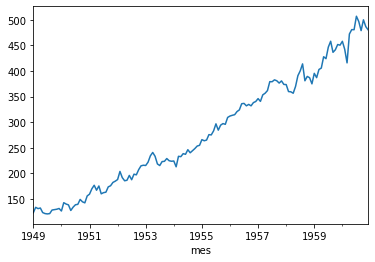

In [30]:
pasajeros['desestacionalizada'].plot();

Covid en México

In [31]:
confirmados = pd.read_excel('covid_mex.xlsx')

In [32]:
confirmados.head()

,fecha,aguascalientes,baja california,baja california sur,campeche,chiapas,chihuahua,distrito federal,coahuila,colima,...,san luis potosi,sinaloa,sonora,tabasco,tamaulipas,tlaxcala,veracruz,yucatan,zacatecas,nacional
0,2020-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-27,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,4
2,2020-02-28,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,2020-02-29,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2020-03-01,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [33]:
confirmados['fecha'] = pd.to_datetime(confirmados['fecha'])

In [34]:
confirmados = confirmados.set_index('fecha')

In [36]:
confirmados.index.freq = 'D'

In [37]:
confirmados.index

DatetimeIndex(['2020-02-26', '2020-02-27', '2020-02-28', '2020-02-29',
               '2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04',
               '2020-03-05', '2020-03-06',
               ...
               '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10',
               '2023-03-11', '2023-03-12', '2023-03-13', '2023-03-14',
               '2023-03-15', '2023-03-16'],
              dtype='datetime64[ns]', name='fecha', length=1115, freq='D')

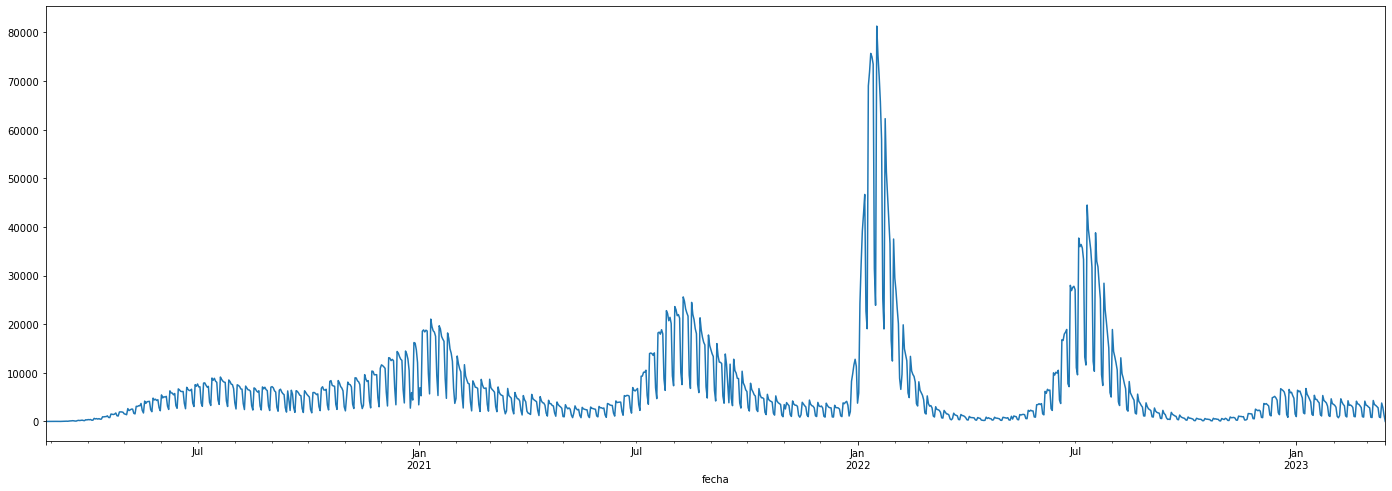

In [38]:
confirmados['nacional'].plot(figsize=(24,8));

(18809.0, 19266.0)

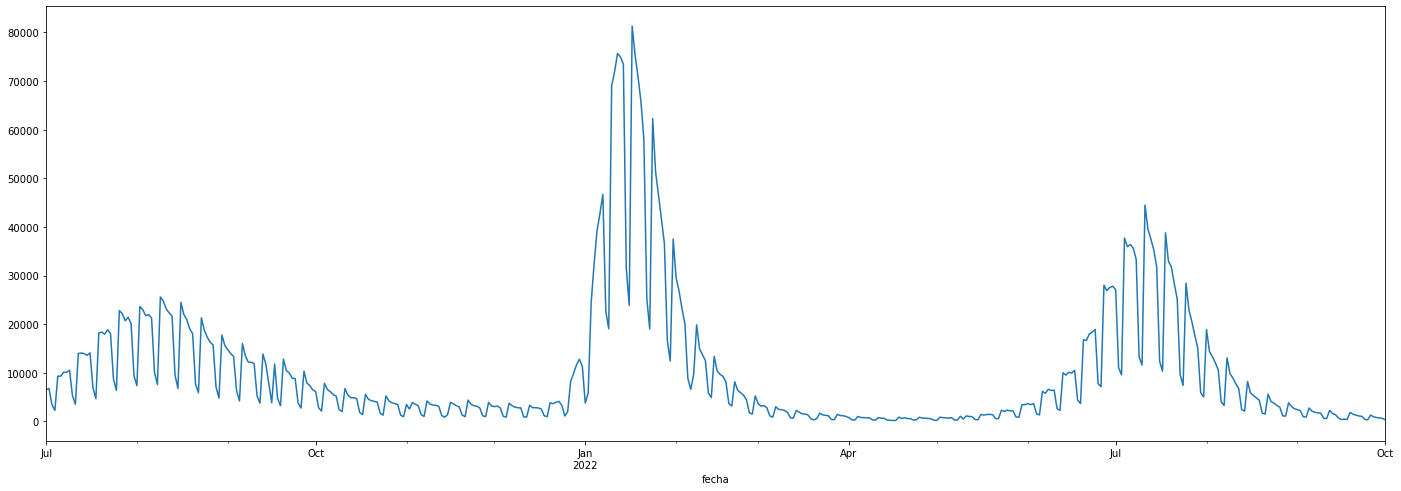

In [39]:
confirmados['nacional'].plot(figsize=(24,8));
plt.xlim('2021-07','2022-10')

In [40]:
serie2 = seasonal_decompose(confirmados['nacional'], model='ad')

In [41]:
confirmados['tendencia nacional'] = serie2.trend

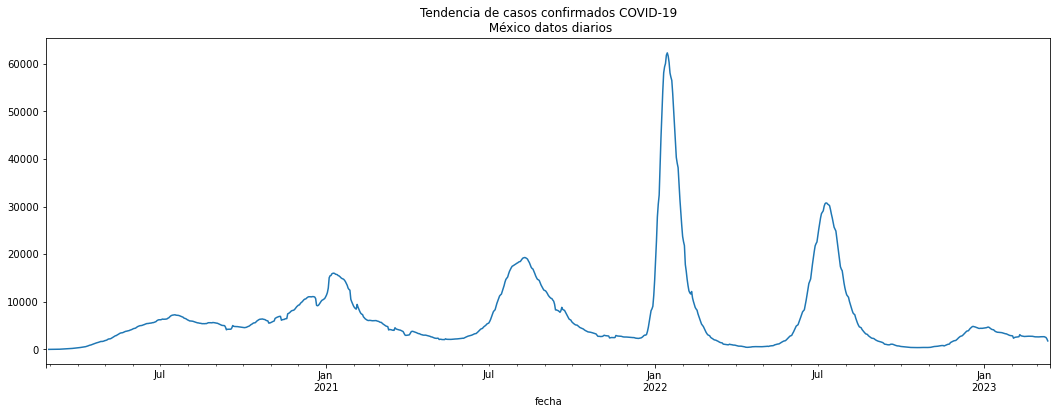

In [42]:
confirmados['tendencia nacional'].plot(figsize=(18,6))
plt.title('Tendencia de casos confirmados COVID-19\n México datos diarios')
plt.show()